In [105]:
from cgeniepy.ecology import EcoModel

LGM_seasonal = EcoModel("../model/muffin.CBE.GIteiiva.BASESFeTDTL_rb.seasonal")
ocn_temp = LGM_seasonal.get_var('ocn_sur_temp').array
global_temp = ocn_temp.mean(dim=['lat','lon'])
lowlat_temp = ocn_temp.sel(lat=slice(-40, 40)).mean(dim=['lat','lon'])
n_highlat_temp = ocn_temp.sel(lat=slice(40, 90)).mean(dim=['lat','lon'])
s_highlat_temp = ocn_temp.sel(lat=slice(-90, -40)).mean(dim=['lat','lon'])

No gemflag is provided, assuming the model includes biogem and ecogem


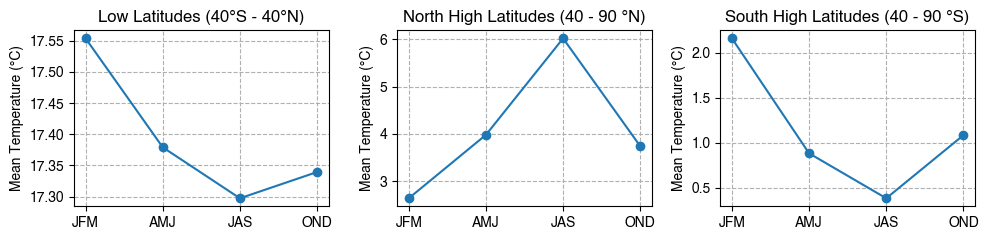

In [136]:
import matplotlib.pyplot as plt

def plot_seasonal_temp(ax, temp, title):
    ## plot seasonal cycle of temperature
    x_labels = ['JFM', 'AMJ', 'JAS', 'OND']
    ## get time > 19 set
    final_temp = temp.where(temp.time > 19, drop=True)

    ax.plot(range(len(x_labels)), final_temp.values, marker='o')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_title(title)
    ax.set_ylabel('Mean Temperature (°C)')
    ## enable grid lines
    ax.grid(True, linestyle='dashed')

# ## use Helvetica as font
plt.rcParams['font.family'] = 'Helvetica'

fig, ax = plt.subplots(1,3, figsize=(10, 2.5))

plot_seasonal_temp(ax[0], lowlat_temp, 'Low Latitudes (40°S - 40°N)')
plot_seasonal_temp(ax[1], n_highlat_temp, 'North High Latitudes (40 - 90 °N)')
plot_seasonal_temp(ax[2], s_highlat_temp, 'South High Latitudes (40 - 90 °S)')
plt.tight_layout()
plt.show()
fig.savefig('../output/figs7.png', dpi=300)